<a href="https://colab.research.google.com/github/spyx-03/retail-sales-statistics-analysis/blob/main/StatisticsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   day    footfall  discount_percent  sales_amount weekday
0    1  199.868566                35  24956.606022     Fri
1    2  174.469428                 9  27821.835290     Wed
2    3  205.907542                36  32858.743794     Wed
3    4  240.921194                 8  14911.629677     Thu
4    5  170.633865                23  24139.620854     Mon

--- Descriptive Statistics ---
Mean: 24556.802989725464
Median: 24327.37988212377
Mode: [ 5813.31608878  6384.54050065  7480.68334836  7802.77060196
  8411.95013361  8726.96236983  8754.83838215  9020.38256971
  9387.69064662  9543.25413828  9655.08960631  9810.85619071
 10451.36341557 11603.55693812 12085.66331793 12608.29768161
 12725.71408625 12728.25067143 13311.54579552 13574.473444
 13592.84909817 13722.96073031 13938.2364428  14329.96626781
 14480.64487659 14911.62967653 14959.44522989 14961.37791537
 15108.82958261 15609.8838954  15714.22688723 15765.98468359
 15832.45496992 15980.8683417  16309.49138336 16315.51945619
 16403.621

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



--- Sampling & CLT ---
Standard Error of Mean: 421.6423520732351


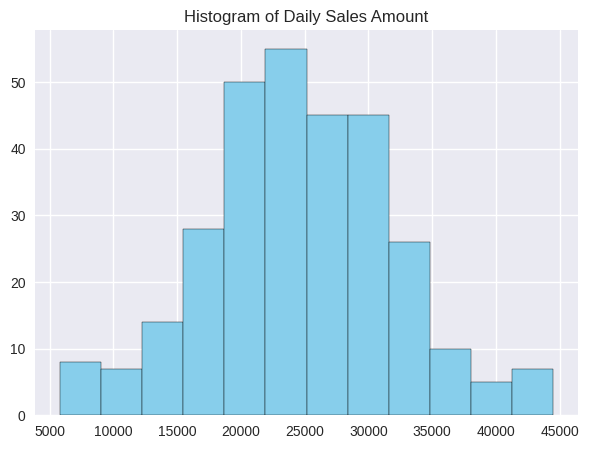

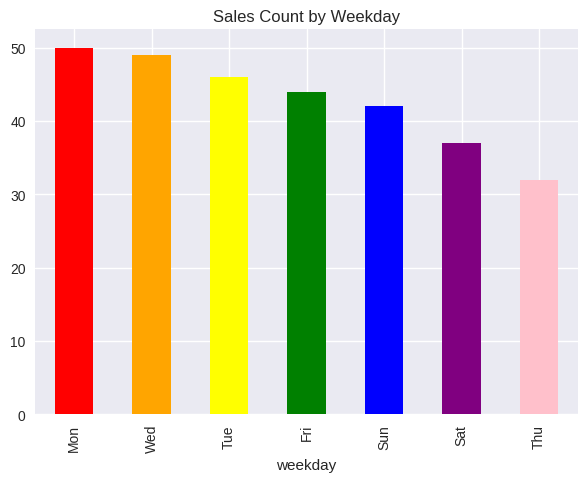

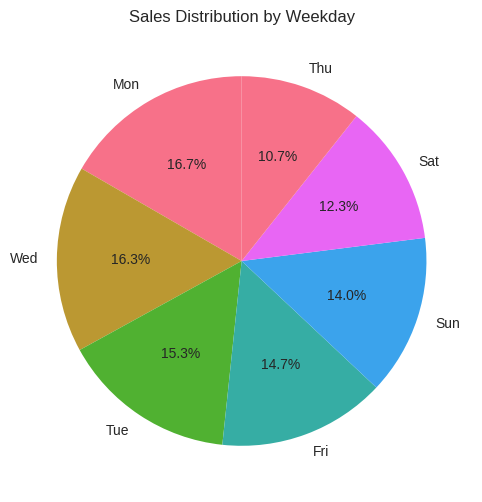

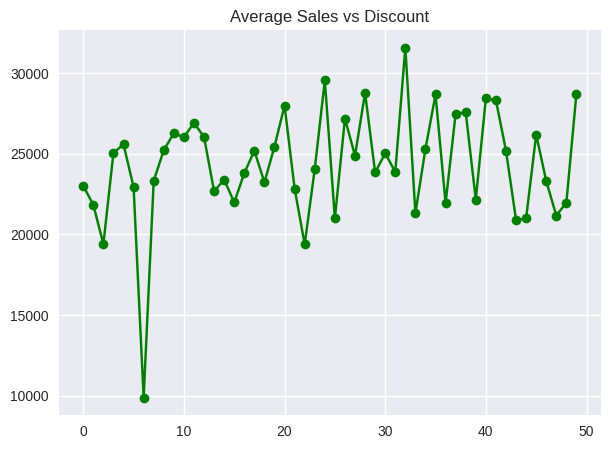

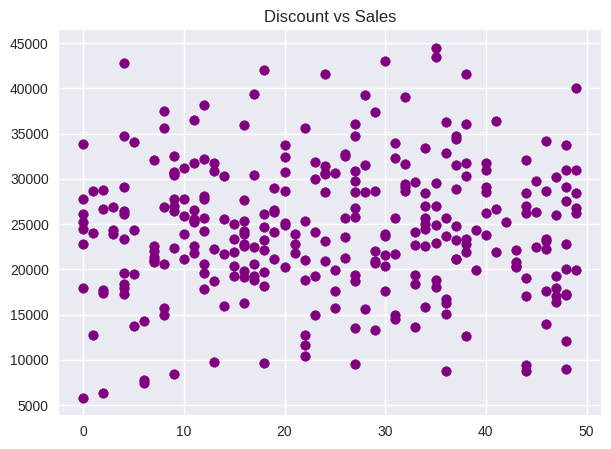

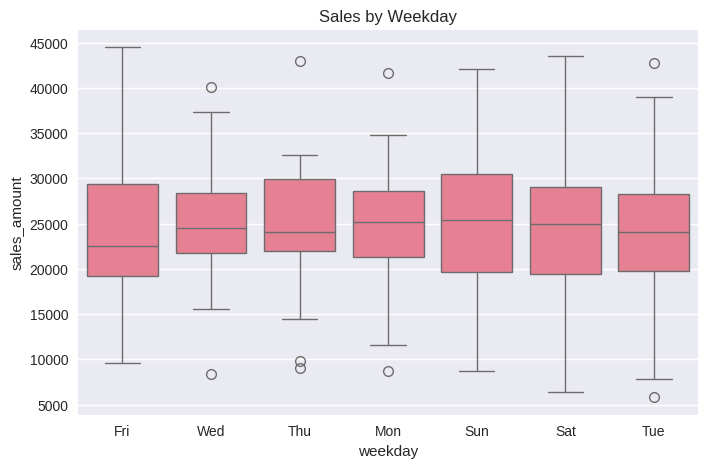

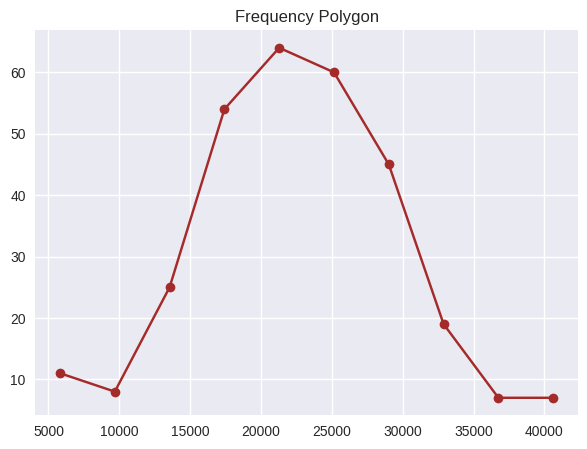

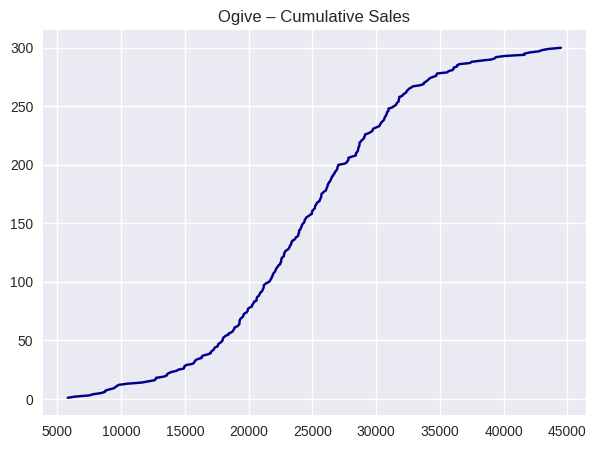

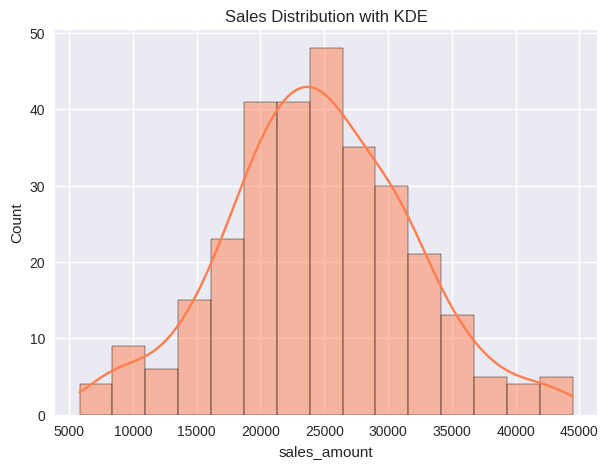

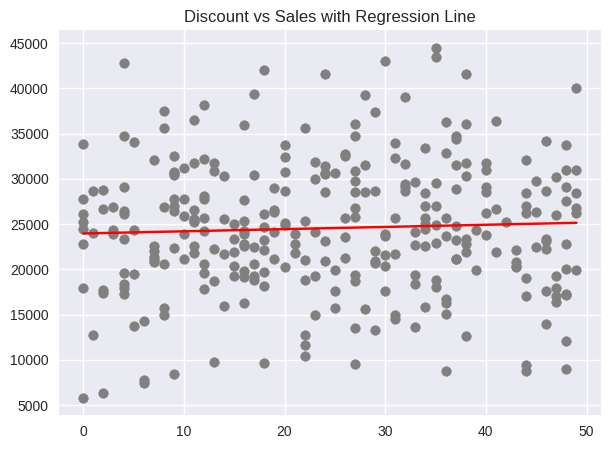

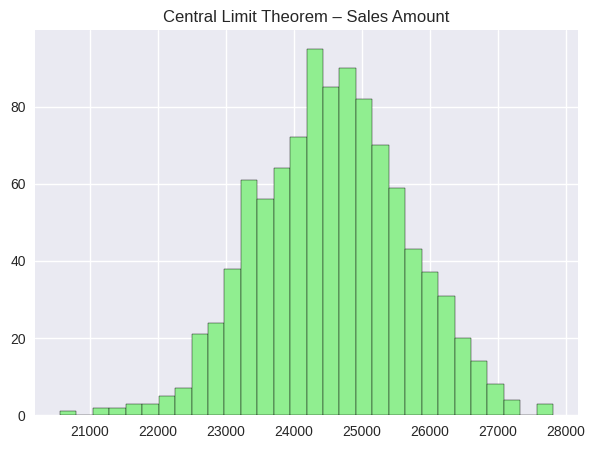

In [2]:
# =========================================================
# IMPORT REQUIRED LIBRARIES
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom, poisson, norm
from sklearn.linear_model import LinearRegression

# =========================================================
# CREATE SYNTHETIC RETAIL SALES DATASET
# =========================================================
np.random.seed(42)
n = 300   # number of days

df = pd.DataFrame({
    "day": range(1, n+1),
    "footfall": np.random.normal(180, 40, n).clip(50),
    "discount_percent": np.random.randint(0, 50, n),
    "sales_amount": np.random.normal(25000, 7000, n).clip(5000),
    "weekday": np.random.choice(
        ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], n
    )
})

print(df.head())

# =========================================================
# DESCRIPTIVE STATISTICS (ALL CALCULATIONS)
# =========================================================
mean_sales = df['sales_amount'].mean()
median_sales = df['sales_amount'].median()
mode_sales = df['sales_amount'].mode().values

range_sales = df['sales_amount'].max() - df['sales_amount'].min()
variance_sales = df['sales_amount'].var()
std_sales = df['sales_amount'].std()

Q1 = df['sales_amount'].quantile(0.25)
Q3 = df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1

CV = (std_sales / mean_sales) * 100

print("\n--- Descriptive Statistics ---")
print("Mean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)
print("Range:", range_sales)
print("Variance:", variance_sales)
print("Standard Deviation:", std_sales)
print("IQR:", IQR)
print("Coefficient of Variation:", CV, "%")

# =========================================================
# CORRELATION ANALYSIS
# =========================================================
pearson_corr = df['discount_percent'].corr(df['sales_amount'])
spearman_corr = df['footfall'].corr(df['sales_amount'], method='spearman')

print("\n--- Correlation ---")
print("Pearson (Discount vs Sales):", pearson_corr)
print("Spearman (Footfall vs Sales):", spearman_corr)

# =========================================================
# SIMPLE LINEAR REGRESSION
# =========================================================
X = df[['discount_percent']]
Y = df['sales_amount']

model = LinearRegression()
model.fit(X, Y)

intercept = model.intercept_
slope = model.coef_[0]

predicted_sales_20 = model.predict([[20]])[0]

print("\n--- Linear Regression ---")
print(f"Regression Equation: Sales = {intercept:.2f} + {slope:.2f} × Discount")
print("Predicted Sales at 20% Discount:", predicted_sales_20)

# =========================================================
# PROBABILITY CALCULATIONS
# =========================================================

# Probability of high sales day
P_high_sales = np.mean(df['sales_amount'] > 40000)

# Binomial probability
binom_prob = binom.pmf(3, 8, P_high_sales)

# Poisson probability
poisson_prob = poisson.pmf(6, 4)

# Normal probability
prob_sales_gt_35000 = 1 - norm.cdf(35000, mean_sales, std_sales)

print("\n--- Probability ---")
print("P(Sales > 40000):", P_high_sales)
print("Binomial P(3 high sales in 8 days):", binom_prob)
print("Poisson P(6 events when avg=4):", poisson_prob)
print("Normal P(Sales > 35000):", prob_sales_gt_35000)

# =========================================================
# SAMPLING & CENTRAL LIMIT THEOREM
# =========================================================

sample_100 = df.sample(100)

sample_means = [df.sample(40)['sales_amount'].mean() for _ in range(1000)]

SEM = std_sales / np.sqrt(len(df))

print("\n--- Sampling & CLT ---")
print("Standard Error of Mean:", SEM)

# =========================================================
# VISUALIZATIONS (ALL GRAPH TYPES)
# =========================================================
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Histogram
plt.figure(figsize=(7,5))
plt.hist(df['sales_amount'], bins=12, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Sales Amount")
plt.show()

# Bar Graph
plt.figure(figsize=(7,5))
df['weekday'].value_counts().plot(
    kind='bar',
    color=['red','orange','yellow','green','blue','purple','pink']
)
plt.title("Sales Count by Weekday")
plt.show()

# Pie Chart
plt.figure(figsize=(6,6))
df['weekday'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Sales Distribution by Weekday")
plt.ylabel("")
plt.show()

# Line Graph
avg_sales_discount = df.groupby('discount_percent')['sales_amount'].mean()
plt.figure(figsize=(7,5))
plt.plot(avg_sales_discount, marker='o', color='green')
plt.title("Average Sales vs Discount")
plt.show()

# Scatter Plot
plt.figure(figsize=(7,5))
plt.scatter(df['discount_percent'], df['sales_amount'], color='purple')
plt.title("Discount vs Sales")
plt.show()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='weekday', y='sales_amount', data=df)
plt.title("Sales by Weekday")
plt.show()

# Frequency Polygon
counts, bins = np.histogram(df['sales_amount'], bins=10)
plt.figure(figsize=(7,5))
plt.plot(bins[:-1], counts, marker='o', color='brown')
plt.title("Frequency Polygon")
plt.show()

# Ogive
sorted_sales = np.sort(df['sales_amount'])
cum_freq = np.arange(1, len(sorted_sales)+1)
plt.figure(figsize=(7,5))
plt.plot(sorted_sales, cum_freq, color='darkblue')
plt.title("Ogive – Cumulative Sales")
plt.show()

# Histogram + KDE
plt.figure(figsize=(7,5))
sns.histplot(df['sales_amount'], kde=True, color='coral')
plt.title("Sales Distribution with KDE")
plt.show()

# Regression Line
m, c = np.polyfit(df['discount_percent'], df['sales_amount'], 1)
x_line = np.linspace(df['discount_percent'].min(),
                     df['discount_percent'].max(), 100)
y_line = m * x_line + c

plt.figure(figsize=(7,5))
plt.scatter(df['discount_percent'], df['sales_amount'], color='gray')
plt.plot(x_line, y_line, color='red')
plt.title("Discount vs Sales with Regression Line")
plt.show()

# CLT Plot
plt.figure(figsize=(7,5))
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title("Central Limit Theorem – Sales Amount")
plt.show()